In [3]:
# %load ../start.py
#!/usr/bin/env python
""" A set of startup parameters for running notebooks with.

I am constantly running the same first few things in cells. To simplify things
I thought I would just have a startup script that gets run as the first cell in
each notebook.
"""

# Activate the autoreload extension for easy reloading of external packages
%reload_ext autoreload
%autoreload 1

# Trun on the water mark
%reload_ext watermark
%watermark -u -d -v

last updated: 2016-09-01 

CPython 3.5.2
IPython 5.1.0


On 2016-08-30, Chris sent a table around relating FlyBase controlled vocabulary to SRR/ERR/DRR ids. Here I summarize the results and begin to look at various aspects of the controlled vocabulary.

In [162]:
# imports
import numpy as np

import pandas as pd
pd.options.display.max_columns = 999
pd.options.display.max_rows = 300

import matplotlib.pyplot as plt
%matplotlib inline

import qgrid

In [146]:
# read chris's table
df = pd.read_csv('../../data/FlyBase/FB_metadata_output_20160830.tsv', sep='\t').set_index('ID')
rows = '{:,}'.format(df.shape[0])

The table is sparse, but has {{rows}} sample IDs. 

In [169]:
# Create summary data frame with counts
def look_at_grp(key):
    key1 = key
    key2 = key.rstrip('_id')
    dat = df[[key1, key2]].dropna()
    
    for g, d in dat.groupby(key1):
        yield (key1, g, d[key2].values[0], d.shape[0])

dlist = []
for key in df.columns:
    if '_id' in key:
        for row in look_at_grp(key):
            dlist.append(row)

summary = pd.DataFrame(dlist, columns=['cv', 'cv_id', 'name', 'count']).set_index(['cv', 'cv_id'])

cv
cell_line_id      Axes(0.125,0.125;0.775x0.775)
sample_type_id    Axes(0.125,0.125;0.775x0.775)
sex_id            Axes(0.125,0.125;0.775x0.775)
stage_id          Axes(0.125,0.125;0.775x0.775)
strain_id         Axes(0.125,0.125;0.775x0.775)
tissue_id         Axes(0.125,0.125;0.775x0.775)
dtype: object

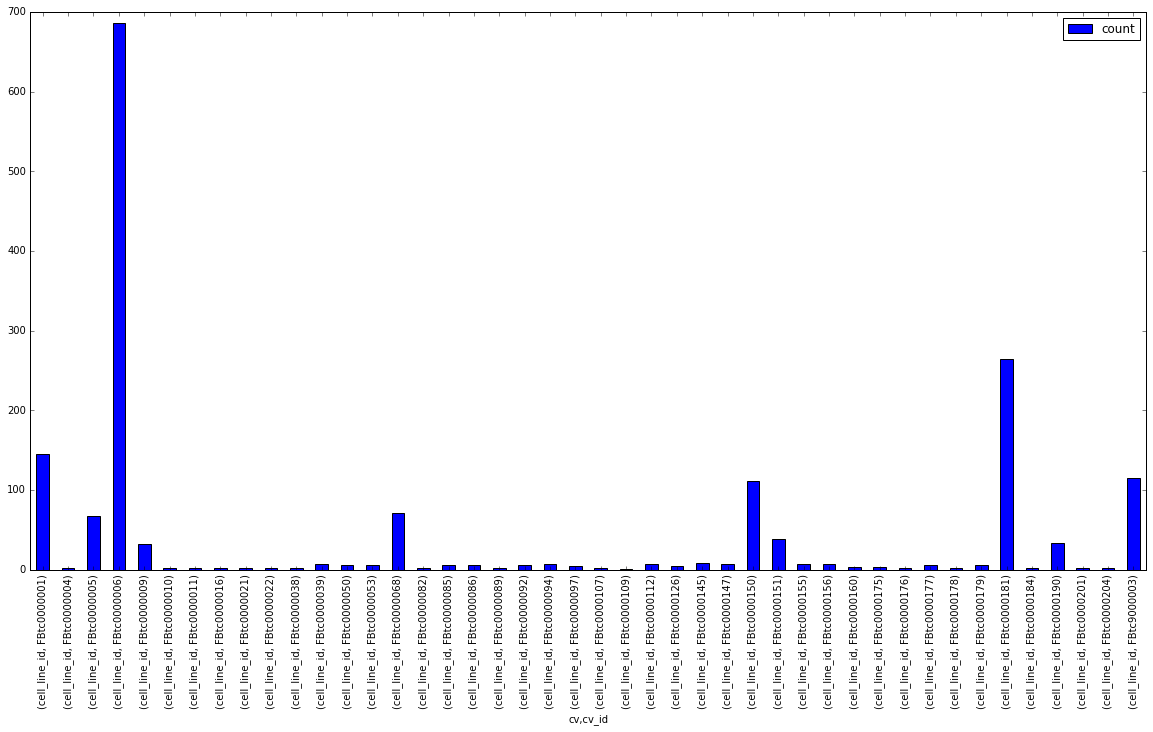

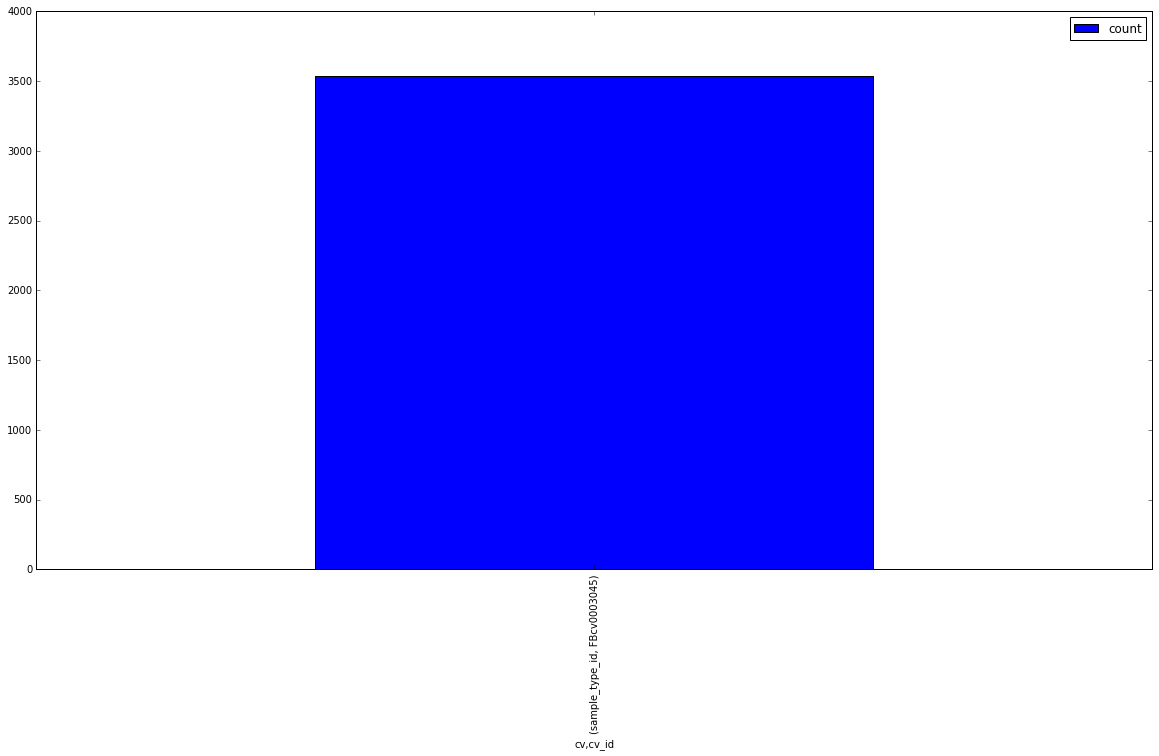

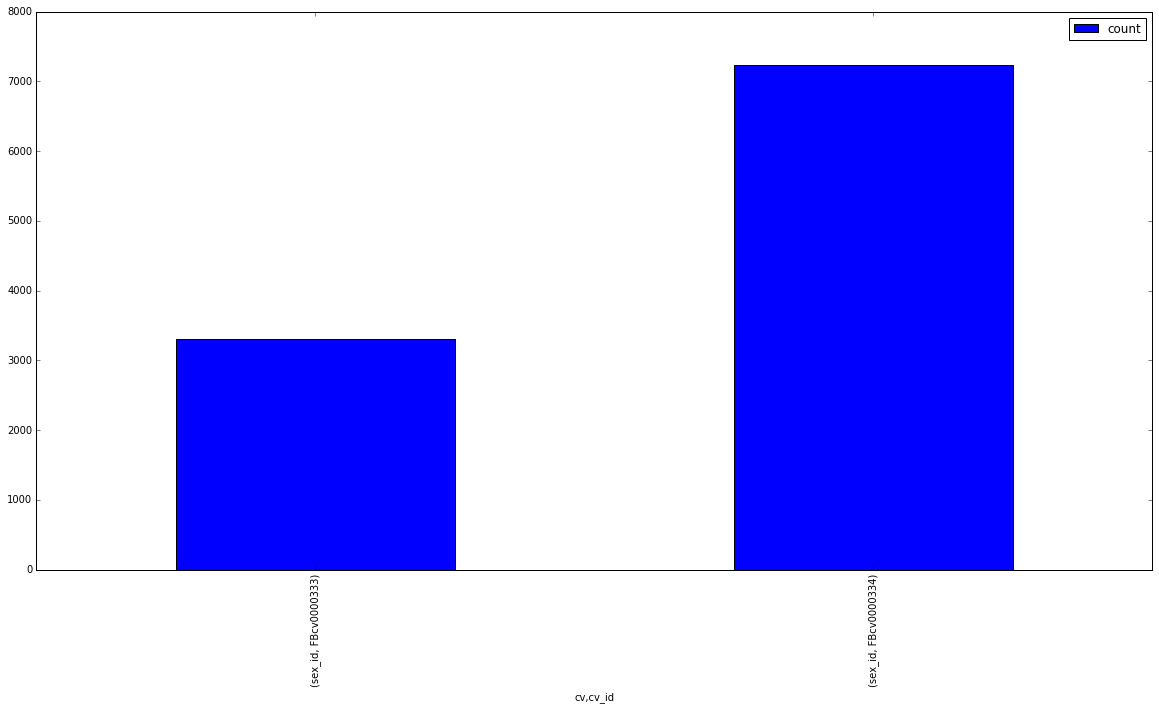

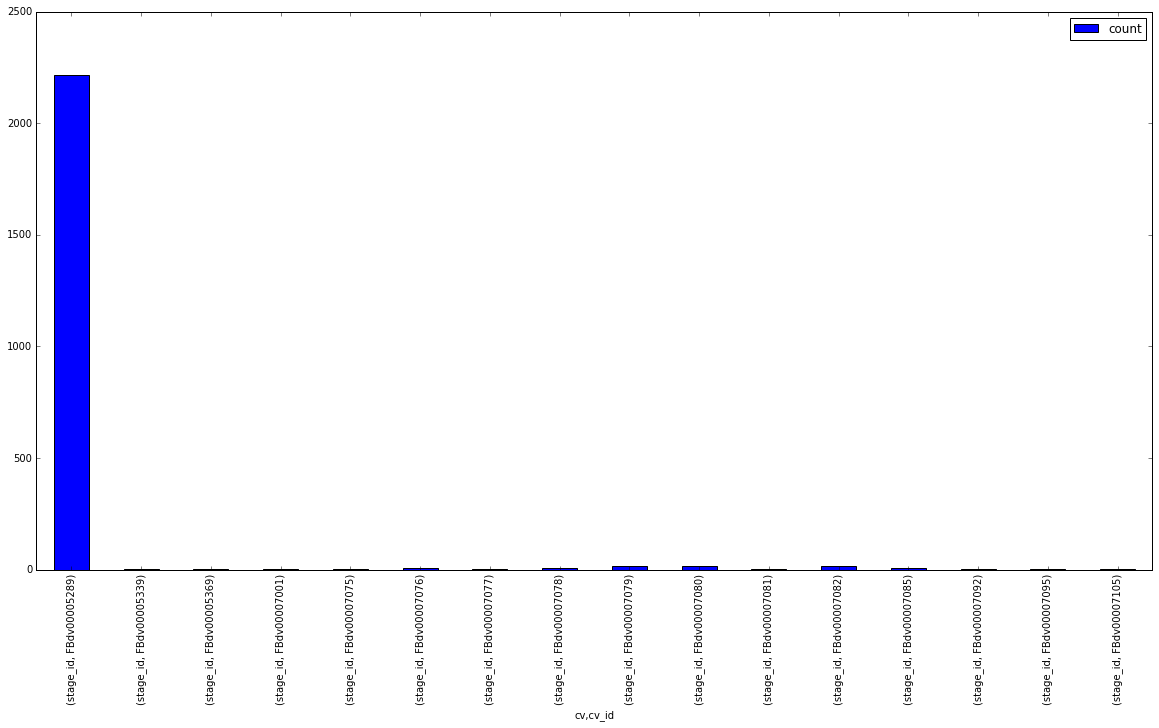

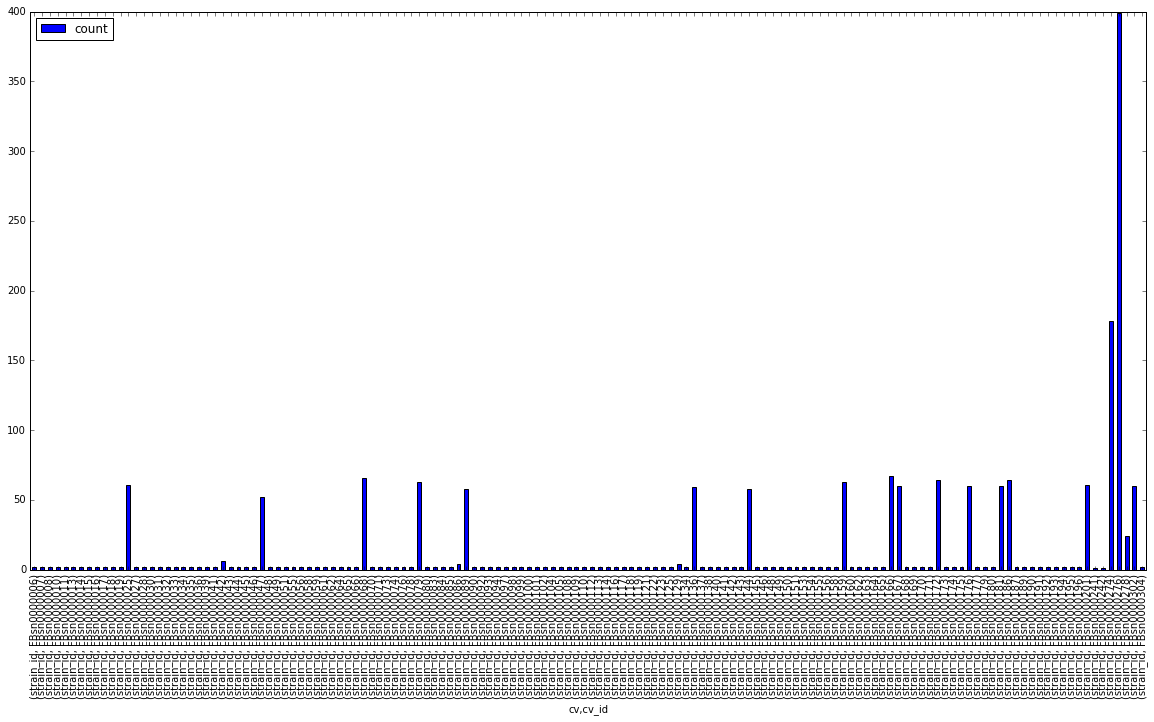

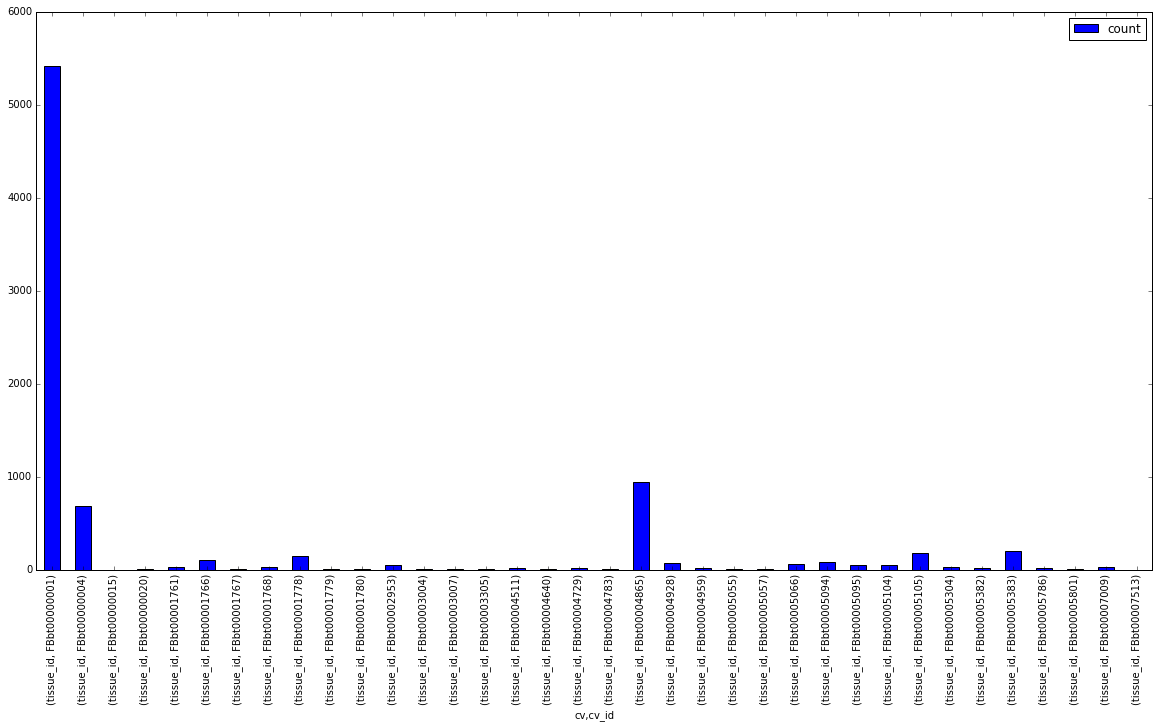

In [170]:
grp = summary.groupby(level=0)
grp.plot(kind='bar', figsize=(20, 10))

In [171]:
qgrid.QGridWidget(df=summary).export()